# Logsitic Regression

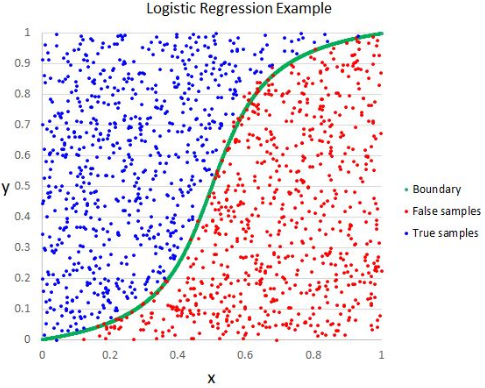



---



### Dataset

In [1]:
import pandas as pd

In [33]:
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [41]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=names, thousands=r',')

In [40]:
df

,buying,maint,doors,persons,lug_boot,safety
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
low,low,5more,more,med,med,good
low,low,5more,more,med,high,vgood
low,low,5more,more,big,low,unacc
low,low,5more,more,big,med,good




---



### Dataset Preprocessing

In [42]:
df = df.replace(['?'], pd.NA)

In [43]:
df = df.dropna(axis=0)

In [44]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [45]:
X = df.iloc[:, :-1]

In [46]:
Y = df.iloc[:, -1]

In [47]:
df

,buying,maint,doors,persons,lug_boot,safety
vhigh,3,0,0,2,1,2
vhigh,3,0,0,2,2,2
vhigh,3,0,0,2,0,2
vhigh,3,0,0,1,1,2
vhigh,3,0,0,1,2,2
...,...,...,...,...,...,...
low,1,3,2,1,2,1
low,1,3,2,1,0,3
low,1,3,2,0,1,2
low,1,3,2,0,2,1




---



### Modeling

split data into training set and test set

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

init model

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logisticRegr = LogisticRegression()

train model

In [55]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

make testing

In [56]:
predictions = logisticRegr.predict(x_test)

evaluation

In [57]:
accuracy = logisticRegr.score(x_test, y_test)
accuracy*100

65.50925925925925



---



### Real Testing

In [60]:
test_case = [1, 0, 0, 1, 1]

In [61]:
logisticRegr.predict([test_case])

array([2], dtype=int8)